# Use basic ML methods for img recognition
by Jenny Zeng & Ariel

In [1]:
%pylab inline
import mltools as ml
plt.style.use('ggplot')
from sklearn.learning_curve import validation_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve,GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn import tree, preprocessing


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


denote number of data    
mesa: 10015    
forest: 10047   
desert: 10142  
training size: 21142  
test size: 9062  
total size:  30204

# Helper function

# multi-class

# Random forest

In [5]:
%pylab inline
import mltools as ml
plt.style.use('ggplot')
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.externals import joblib

In [6]:
def convertLabel(lab, NUM_LABELS):
    return (numpy.arange(NUM_LABELS) == lab[:, None]).astype(numpy.float32)

In [7]:
from sklearn.externals import joblib

In [8]:
def error_rate(predictions, labels, NUM_LABELS):
    """Return the error rate and confusions."""
    correct = numpy.sum(numpy.argmax(predictions, 1) == numpy.argmax(labels, 1))
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = numpy.zeros([NUM_LABELS, NUM_LABELS], numpy.float32)
    bundled = zip(numpy.argmax(predictions, 1), numpy.argmax(labels, 1))
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

print('Done')

Done


In [9]:
def train_by_file(filename, model, NUM_LABELS, ratio=0.9):
    data = np.loadtxt(filename, delimiter=';')
    np.random.shuffle(data)
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int64)
    Xtr, Xte, Ytr, Yte = ml.splitData(X,Y,train_fraction=ratio)
    model = model.fit(Xtr, convertLabel(Ytr, NUM_LABELS))
    return model, Xte, Yte
    

In [18]:
def test_result(model, Xte, Yte, NUM_LABELS):
    result=model.predict(Xte)
    test_error,confusions=error_rate(result, convertLabel(Yte,NUM_LABELS),NUM_LABELS)
    print('Test error: {}%'.format(test_error))

    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(False)
    plt.xticks(numpy.arange(NUM_LABELS))
    plt.yticks(numpy.arange(NUM_LABELS))
    plt.imshow(confusions, cmap=plt.cm.coolwarm, interpolation='nearest');

    for i, cas in enumerate(confusions):
        for j, count in enumerate(cas):
            if count > 0:
                xoff = .07 * len(str(count))
                plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')


# Biome

Test error: 5.63114925686%


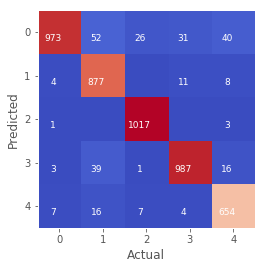

In [19]:
NUM_LABELS = 5
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=3)
biome_model, Xte, Yte = train_by_file(
    '/notebooks/Minecraft-AI/mc-data/biome_reg/loaded_data/mesa_forest_desert_jungle_eh_new.txt',
    multi_target_forest,
    NUM_LABELS)
test_result(biome_model, Xte, Yte, NUM_LABELS)

In [21]:
joblib.dump(biome_model, '/notebooks/Minecraft-AI/sklearn_model/biome.pkl') 

['/notebooks/Minecraft-AI/sklearn_model/biome.pkl']

# Animal data

**pig dataset:**  
denote number of data  
fence: 433  
pig: 404 
training size: 669  
test size: 168  
total size:  837

Test error: 6.13496932515%


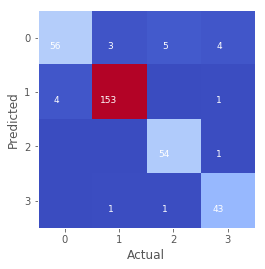

In [22]:
NUM_LABELS = 4
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=3)
animal_model, Xte, Yte = train_by_file(
    '/notebooks/Minecraft-AI/mc-data/animal.txt',
    multi_target_forest,
    NUM_LABELS)
test_result(animal_model, Xte, Yte, NUM_LABELS)

In [23]:
joblib.dump(animal_model, '/notebooks/Minecraft-AI/sklearn_model/animal.pkl') 

['/notebooks/Minecraft-AI/sklearn_model/animal.pkl']

# Weather

label: 0 size: 1196
label: 0 size: 1309
label: 1 size: 684
label: 2 size: 1000
training size: 3351
test size: 838
total size: 4189

Test error: 3.26409495549%


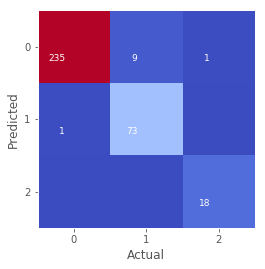

In [24]:
NUM_LABELS=3
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=3)
animal_model, Xte, Yte = train_by_file(
    '/notebooks/Minecraft-AI/mc-data/clear_rain_thunder_train.txt',
    multi_target_forest,
    NUM_LABELS)
test_result(animal_model, Xte, Yte, NUM_LABELS)

In [25]:
# save model
joblib.dump(animal_model, '/notebooks/Minecraft-AI/sklearn_model/weather.pkl') 

['/notebooks/Minecraft-AI/sklearn_model/weather.pkl']

# Save the model

# example that makes mistake

In [ ]:
FILE_SAVE_PATH2 = '/notebooks/Minecraft-AI/mc-data/fence_pig2.txt'

In [ ]:
datan = np.loadtxt(FILE_SAVE_PATH2, delimiter=';')


In [ ]:
datan

In [ ]:
np.random.shuffle(datan)
XPI= datan[:,:-1]
YPI = datan[:,-1].astype(np.int64)
data_scalern = preprocessing.StandardScaler().fit(XPI)
XPI_scaled = data_scalern.transform(XPI)


In [ ]:
resultn1=r1.predict(XPI_scaled)
resultn1
